<a target="_blank" href="https://colab.research.google.com/github/HN-Vignolles/phy/blob/main/notebooks/phy1.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

$\renewcommand{\vect}[1]{\boldsymbol{#1}}$
$$\begin{cases}
M\vect{r}_{CM} = \sum{m_i\vect{r}_i} \\
M\vect{v}_{CM} = \sum{m_i\vect{v}_i} = \sum{\vect{p}_i} = \vect{p}_{sys} \\
M\vect{a}_{CM} = \sum{m_i\vect{a}_i} = \sum{\vect{F}_i} = \underbrace{\sum{\vect{F}_{i,int}}}_{=0} + \underbrace{\sum{\vect{F}_{i,ext}}}_{\vect{F}_{net,ext}} = \vect{\dot{p}}_{sys}
\end{cases}$$


$$\vect{L} = m\vect{r}\times\left(\vect{v}_r+\vect{v}_{\theta}\right) \qquad \text{non circular}$$
$$\vect{L}_{sys} = \sum{\vect{L}_i} = \vect{L}_{orb} + \vect{L}_{spin} = \vect{r}_{CM} \times M\vect{v}_{CM} + \sum{\vect{r}_{i|CM} \times m_i\vect{u}_i}$$
$$\Delta\vect{L}_{sys} = \int_{t_1}^{t_2}{\vect{\tau}_{net}}dt$$

$$\vect{\tau} = \vect{r}\times\vect{F} = \frac{d\vect{L}}{dt}$$

$$\text{CIR}\begin{cases}
\theta &= x/R \\
M\vect{a}_{CM} &= \sum{\vect{F}_i} = \sum{F_x}\vect{i} + \sum{F_y}\vect{j} \\
\vect{\tau}_{CIR} &= \sum{\vect{\tau}_{i|CIR}} = \sum{\vect{r}_{i|CIR}\times\vect{F}_i} \quad \text{e.g.}\; = RP\sin{\alpha}(-\vect{k})\\
\vect{L}_{CIR} &= I_{CIR}\vect{\omega} \quad \text{e.g.}\; = (I_{CM}+MR^2)\omega(-\vect{k}) \\ 
\end{cases}$$

$$\mathcal{P} = \frac{dW}{dt} = \frac{\vect{F}\cdot d\vect{r}}{dt} = \vect{F} \cdot \vect{v}, \quad \text{if W const.?}  = \frac{W}{\Delta T}$$
$$\mathcal{P(\tau)} = \tau \omega$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

def X(t, x0, v0, a):
    return x0 + v0*t + 0.5*a*t**2

def V(t, v0, a):
    return v0 + a*t

t = np.linspace(0, 10, 200)
x = X(t, 1, 1, 2)
v = V(t, 1, 2)

def update(x0=0, v0=0, a=1):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(t, X(t, x0, v0, a))
    plt.xlim(-1,10)
    plt.ylim(-20,40)
    plt.xlabel('$t$')
    plt.ylabel('$x$')
    plt.subplot(1, 2, 2)
    plt.plot(t, V(t, v0, a))
    plt.xlim(-1,10)
    plt.ylim(-10,20)
    plt.xlabel('$t$')
    plt.ylabel('$v$')
    plt.show()

interactive_plot = interact(update, x0=(-10,10), v0=(-5,5), a=(-2,2))
interactive_plot;

interactive(children=(IntSlider(value=0, description='x0', max=10, min=-10), IntSlider(value=0, description='v…

$\left.v(t) = \left[ 0.5 \cos{\left(0.5 t \right)}, \  - 0.5 \sin{\left(0.5 t \right)}\right]\right\rvert_{t=0.25} = [0.4961,\;-0.0623]$

$\left.v(t) = \left[ 0.5 \cos{\left(0.5 t \right)}, \  - 0.5 \sin{\left(0.5 t \right)}\right]\right\rvert_{t=20} = [-0.4195,\;0.2720]$

$\left.\overrightarrow{a}(t) = \left[ - 0.25 \sin{\left(0.5 t \right)}, \  - 0.25 \cos{\left(0.5 t \right)}\right]\right\rvert_{t=0.25} = [-0.0312,\;-0.2480]$

$\quad \hat{T} = [0.9922,\;-0.1247]$

$\quad a_T = \overrightarrow{a}\cdot\hat{T} = 0.0$

$\quad \overrightarrow{a_T}  = a_T\hat{T} = [0.0000,\;-0.0000]$

$\quad \hat{N} = [-0.1247,\;-0.9922]$

$\quad a_N = \overrightarrow{a}\cdot\hat{N} = 0.25$

$\quad \overrightarrow{a_N} = [-0.0312,\;-0.2480]$

$\left.\overrightarrow{a}(t) = \left[ - 0.25 \sin{\left(0.5 t \right)}, \  - 0.25 \cos{\left(0.5 t \right)}\right]\right\rvert_{t=20} = [0.1360,\;0.2098]$

$\quad \hat{T} = [-0.8391,\;0.5440]$

$\quad a_T = \overrightarrow{a}\cdot\hat{T} = 0.0$

$\quad \overrightarrow{a_T}  = a_T\hat{T} = [-0.0000,\;0.0000]$

$\quad \hat{N} = [0.5440,\;0.8391]$

$\quad a_N = \overrightarrow{a}\cdot\hat{N} = 0.25$

$\quad \overrightarrow{a_N} = [0.1360,\;0.2098]$

(-2.0, 2.0)

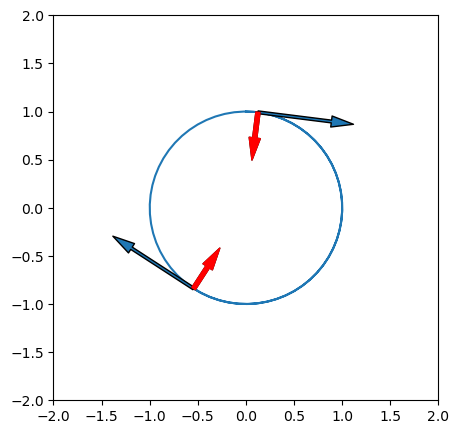

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import sympy as sp
from sympy.utilities.lambdify import implemented_function
from IPython.display import Markdown, Latex

t = sp.symbols('t')

def v_vector(r:list, ax, t0, scale=None):
    v = [sp.diff(r_, t) for r_ in r]
    r_t0 = [float(r_.subs({t:t0})) for r_ in r]
    v_t0 = [float(v_.subs({t:t0})) for v_ in v]
    if not scale or not ax:
        return v, v_t0
    display(Markdown('$\\left.v(t) = {}\\right\\rvert_{{t={}}} = [{:.4f},\\;{:.4f}]$'.format(sp.latex(v), t0, *v_t0)))
    ax.annotate("", xytext=(r_t0[0], r_t0[1]), xy=(r_t0[0] + scale*v_t0[0], r_t0[1] + scale*v_t0[1]), arrowprops=dict(headwidth=8, headlength=16, width=2))
    return

def a_vector(r:list, ax, t0, scale):
    a = [sp.diff(r_, t, t) for r_ in r]
    r_t0 = [float(r_.subs({t:t0})) for r_ in r]
    a_t0 = [float(a_.subs({t:t0})) for a_ in a]
    display(Markdown('$\\left.\\overrightarrow{{a}}(t) = {}\\right\\rvert_{{t={}}} = [{:.4f},\\;{:.4f}]$'.format(sp.latex(a), t0, *a_t0)))
    ax.annotate("", xytext=(r_t0[0], r_t0[1]), xy=(r_t0[0] + scale*a_t0[0], r_t0[1] + scale*a_t0[1]), arrowprops=dict(headwidth=8, headlength=16, width=3))
    v, v_t0 = v_vector(r, None, t0)
    T = v_t0/np.linalg.norm(v_t0)
    display(Markdown('$\\quad \\hat{{T}} = [{:.4f},\\;{:.4f}]$'.format(*T)))
    a_T_ = np.dot(a_t0,T)
    display(Markdown('$\\quad a_T = \\overrightarrow{{a}}\\cdot\\hat{{T}} = {}$'.format(a_T_)))
    a_T = a_T_*T
    display(Markdown('$\\quad \\overrightarrow{{a_T}}  = a_T\\hat{{T}} = [{:.4f},\\;{:.4f}]$'.format(*a_T)))
    N = [[0,1],[-1,0]]@T
    display(Markdown('$\\quad \\hat{{N}} = [{:.4f},\\;{:.4f}]$'.format(*N)))
    a_N_ = np.dot(a_t0,N)
    display(Markdown('$\\quad a_N = \\overrightarrow{{a}}\\cdot\\hat{{N}} = {}$'.format(a_N_)))
    a_N = a_N_*N
    display(Markdown('$\\quad \\overrightarrow{{a_N}} = [{:.4f},\\;{:.4f}]$'.format(*a_N)))
    ax.annotate("", xytext=(r_t0[0], r_t0[1]), xy=(r_t0[0] + scale*a_T[0], r_t0[1] + scale*a_T[1]), arrowprops=dict(headwidth=8, headlength=16, width=3, color="green"))
    ax.annotate("", xytext=(r_t0[0], r_t0[1]), xy=(r_t0[0] + scale*a_N[0], r_t0[1] + scale*a_N[1]), arrowprops=dict(headwidth=8, headlength=16, width=3, color="red"))
    return

T = np.linspace(0, 20, 100)
r = [sp.sin(t*0.5), sp.cos(t*0.5)]
r_iFunc = implemented_function('r', lambda t: [np.sin(t*0.5), np.cos(t*0.5)])
r_lambda = sp.lambdify(t, r_iFunc(t))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(*r_lambda(T))
v_vector(r, ax, 0.25, 2)
v_vector(r, ax, 20, 2)
a_vector(r, ax, 0.25, 2)
a_vector(r, ax, 20, 2)

ax.set_aspect('equal')
ax.set_ylim(-2,2)
ax.set_xlim(-2,2)

#v1 = v0 + sp.integrate(a_, (t, 0, t1))
#display(Markdown('$v_1 = {}$'.format(sp.latex(v1))))

$\left.\overrightarrow{a}(t) = \left[ 0, \  3.6\right]\right\rvert_{t=3} = [0.0000,\;3.6000]$

$\quad \hat{T} = [-0.3162,\;0.9487]$

$\quad a_T = \overrightarrow{a}\cdot\hat{T} = 3.4152598729818497$

$\quad \overrightarrow{a_T}  = a_T\hat{T} = [-1.0800,\;3.2400]$

$\quad \hat{N} = [0.9487,\;0.3162]$

$\quad a_N = \overrightarrow{a}\cdot\hat{N} = 1.1384199576606167$

$\quad \overrightarrow{a_N} = [1.0800,\;0.3600]$

$\left.v(t) = \left[ -3.6, \  3.6 t\right]\right\rvert_{t=3} = [-3.6000,\;10.8000]$

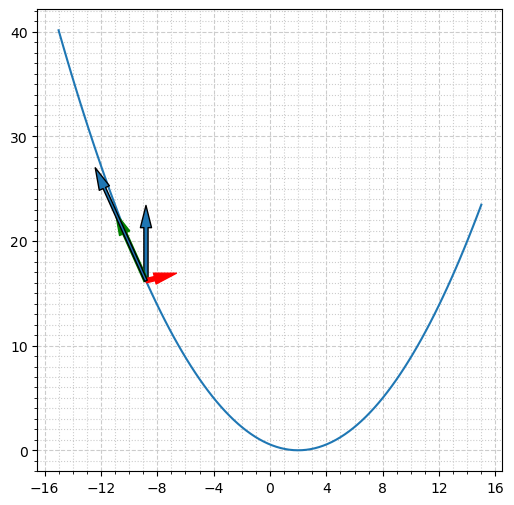

In [31]:
# 1.6
T = np.linspace(-15, 10, 100)
t = sp.symbols('t')
r_x = 2.0 - 3.6*t
r_y = 1.8*t**2
r = [r_x, r_y]

X = np.linspace(-15, 15, 100)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(X, (1.8*(2.0-X)**2)/12.96)

ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')


#ax.set_aspect('equal')
#ax.set_ylim(-5,5)
#ax.set_xlim(10,30)

a_vector(r, ax, 3, 2.0)
v_vector(r, ax, 3, 1.0)

coordenadas (en forma vectorial):  [125*t**3, 5*t]


$\left.\overrightarrow{a}(t) = \left[ 750 t, \  0\right]\right\rvert_{t=0.2} = [150.0000,\;0.0000]$

$\quad \hat{T} = [0.9487,\;0.3162]$

$\quad a_T = \overrightarrow{a}\cdot\hat{T} = 142.30249470757707$

$\quad \overrightarrow{a_T}  = a_T\hat{T} = [135.0000,\;45.0000]$

$\quad \hat{N} = [0.3162,\;-0.9487]$

$\quad a_N = \overrightarrow{a}\cdot\hat{N} = 47.43416490252568$

$\quad \overrightarrow{a_N} = [15.0000,\;-45.0000]$

$\left.v(t) = \left[ 375 t^{2}, \  5\right]\right\rvert_{t=0.2} = [15.0000,\;5.0000]$

142.30249470757707


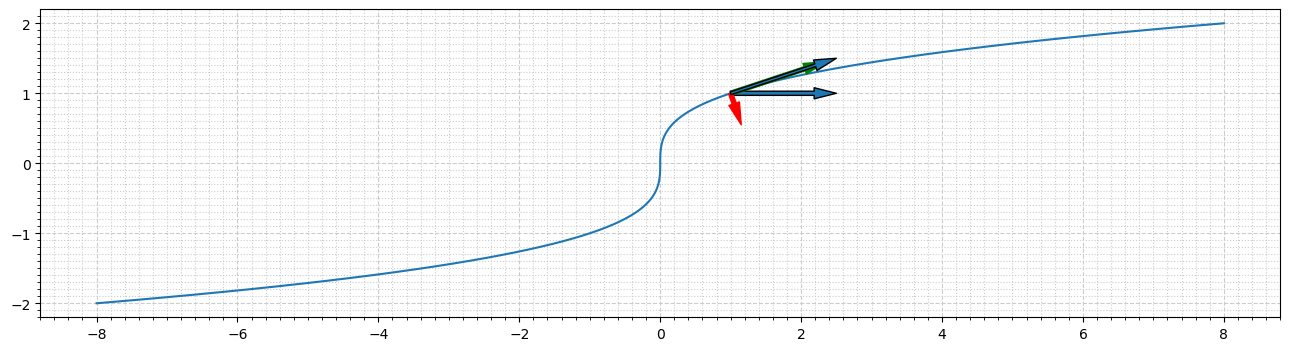

In [6]:
T = np.linspace(0, 20, 100)

v_x = 375*t**2
v_y = 5
v = [v_x, v_y]
r = [sp.integrate(v_x,t), sp.integrate(v_y,t)]
print('coordenadas (en forma vectorial): ', r)
# y = 5t -> t = y/5 -> x = 125*(y/5)**3

Y = np.linspace(-2,2,100)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot()
ax.plot(125*(Y/5)**3, Y)

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')


#ax.set_aspect('equal')
#ax.set_ylim(-5,5)
#ax.set_xlim(10,30)

a_vector(r, ax, 0.2, 0.01)
v_vector(r, ax, 0.2, 0.1)
print(45*np.sqrt(10))

In [7]:
import numpy as np

R = [0.8495, -0.5276, 0]
V = [1.0832, 1.6811, 0]
print(np.cross(R, V)/np.linalg.norm(R)**2)

R = [1.2743, -0.7913, 0]
V = [1.6248, 2.5217, 0]
print(np.cross(R, V))
print(np.linalg.norm(R), np.linalg.norm(R)**2)
print(np.cross(R, V)/np.linalg.norm(R)**2)

[-0.          0.          1.99956676]
[-0.          0.          4.49910655]
1.4999987266661263 2.2499961800000006
[-0.          0.          1.99960631]
